Importing Required Python Libraries

In [108]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [109]:
import nltk
nltk.download('stopwords')
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CW\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Loading Dataset

In [110]:
news_dataset = pd.read_csv('Data.csv')

Data Pre-Processing

In [111]:
news_dataset.shape

(500, 5)

In [112]:
# print the first 5 rows of the dataframe
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [113]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

id         0
title      8
author    60
text       6
label      0
dtype: int64

In [114]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

In [115]:
# separating the data & label
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']
print(X)
print(Y)

      id                                              title  \
0      0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1      1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2      2                  Why the Truth Might Get You Fired   
3      3  15 Civilians Killed In Single US Airstrike Hav...   
4      4  Iranian woman jailed for fictional unpublished...   
..   ...                                                ...   
495  495  Contaminated Food from China Now Entering the ...   
496  496  Ten Famous People on What to Read This Summer ...   
497  497  SCANDAL: EPA could have issued an emergency or...   
498  498  Hillary Clinton KNEW 5 years ago Anthony Weine...   
499  499  أوروبا وخيار القوة في مواجهة اللاجئين - RT Arabic   

                                    author  \
0                            Darrell Lucus   
1                          Daniel J. Flynn   
2                       Consortiumnews.com   
3                          Jessica Purkiss   
4            

In [116]:
port_stem = PorterStemmer()

def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

news_dataset['text'] = news_dataset['text'].apply(stemming)
print(news_dataset['text'])

0      hous dem aid even see comey letter jason chaff...
1      ever get feel life circl roundabout rather hea...
2      truth might get fire octob tension intellig an...
3      video civilian kill singl us airstrik identifi...
4      print iranian woman sentenc six year prison ir...
                             ...                        
495    contamin food china enter u organ label chines...
496    bookshop websit one grand book editor aaron hi...
497    scandal epa could issu emerg order month flint...
498    wikileak email releas monday reveal clinton st...
499                                   gmt http ar rt com
Name: text, Length: 500, dtype: object


In [117]:
#separating the data and label
X = news_dataset['text'].values
Y = news_dataset['label'].values

Feature Engineering (Vectorizing)

In [118]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

ALGORITHM 1 : LOGISTIC REGRESSION

In [119]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, stratify=Y, random_state=2)

WITH PACKAGE IMPLEMENTATION

In [120]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)

LogisticRegression()

MANUAL TESTING for WITH PACKAGE IMPLEMENTATION

In [121]:
#CREATING FUNCTION FOR MANUAL TESTING OF CLASSIFIERS

def manual_testing(classifier):  #passing respective classifier for each algorithm
    # Taking input of any news in form of text
    X = input("ENTER A NEWS FOR PREDICTION: ")
    # Apply stemming to the input text
    X_new = stemming(X)

    # Vectorize the stemmed textvectorizer.fit(X)
    X = vectorizer.transform([X_new])
    X = X.toarray()
    
    # Make the prediction
    prediction = classifier.predict(X)
    if (prediction==0):
     print('The news is Real ',prediction)
    else:
     print('The news is Fake',prediction)

In [122]:
manual_testing(logistic_model)

The news is Real  [0]


EVALUATION

1) CLASSIFICATION REPORT

In [123]:
from sklearn.metrics import classification_report
y_pred = logistic_model.predict(X_test)
print('Classification Report:\n',classification_report(Y_test,y_pred, target_names=['Fake', 'Real']))

Classification Report:
               precision    recall  f1-score   support

        Fake       0.90      0.86      0.88        86
        Real       0.86      0.90      0.88        79

    accuracy                           0.88       165
   macro avg       0.88      0.88      0.88       165
weighted avg       0.88      0.88      0.88       165



2) CONFUSION MATRIX

Confusion Matrix:
 [[74 12]
 [ 8 71]]


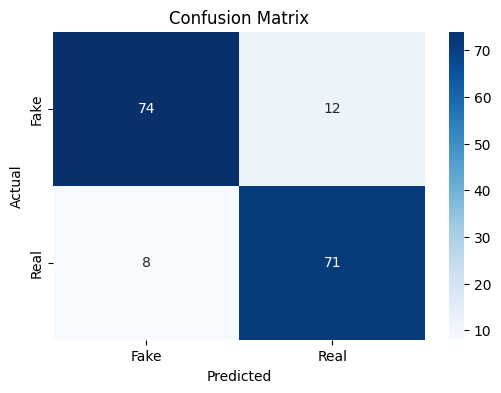

In [124]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

WITHOUT PYTHON PACKAGE IMPLEMENTATION

In [125]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size=0.33, random_state=1234)
#converting sparse matrix (csr_matrix) to array
X1_train = X1_train.toarray()
X1_test = X1_test.toarray()

In [126]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

class logistic_regression():

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        # Convert probabilities to binary predictions
        binary_predictions = (y_pred >= 0.5).astype(int)
        return binary_predictions

In [127]:
log_r = logistic_regression(lr=0.01)
log_r.fit(X1_train,y1_train)

MANUAL TESTING for WITHOUT PACKAGE IMPLEMENTATION

In [128]:
manual_testing(log_r)

The news is Real  [0]


EVALUATION
1) CLASSIFICATION REPORT

In [129]:
y1_pred = log_r.predict(X1_test)
print('Classification Report:\n',classification_report(y1_test,y1_pred, target_names=['Fake', 'Real']))

Classification Report:
               precision    recall  f1-score   support

        Fake       0.53      1.00      0.69        87
        Real       0.00      0.00      0.00        78

    accuracy                           0.53       165
   macro avg       0.26      0.50      0.35       165
weighted avg       0.28      0.53      0.36       165



C:\Users\CW\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\CW\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\CW\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:151

2) CONFUSION MATRIX

Confusion Matrix:
 [[87  0]
 [78  0]]


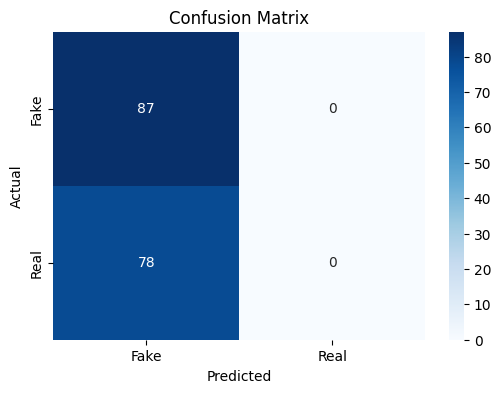

In [130]:
cm = confusion_matrix(y1_test,y1_pred)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

ALGORITHM 2 : PASSIVE AGRESSIVE CLASSIFIER

WITH PYTHON PACKAGE IMPLEMENTATION

In [131]:
#SPLITTING INTO TRAIN AND TEST DATSET
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [132]:
#IMPLEMENTING PASSIVE AGRESSIVE CLASSIFER
from sklearn import metrics
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=10000)
linear_clf.fit(X2_train, Y2_train)
y2_pred = linear_clf.predict(X2_test)

MANUAL TESTING

In [133]:
manual_testing(linear_clf)

The news is Real  [0]


EVALUATION
1) CLASSIFICATION REPORT

In [134]:
print(classification_report(Y2_test, y2_pred, target_names=['Fake', 'Real']))

              precision    recall  f1-score   support

        Fake       0.83      0.86      0.84        83
        Real       0.85      0.82      0.83        82

    accuracy                           0.84       165
   macro avg       0.84      0.84      0.84       165
weighted avg       0.84      0.84      0.84       165



2) CONFUSION MATRIX

Confusion Matrix:
 [[71 12]
 [15 67]]


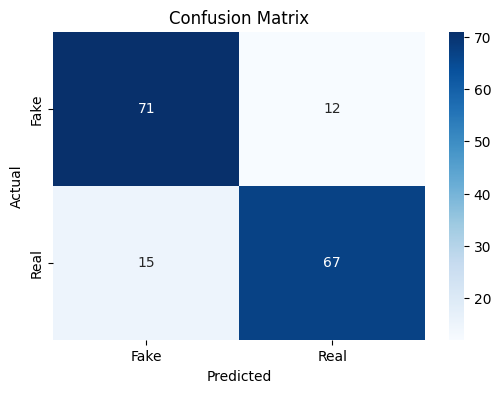

In [135]:
cm = confusion_matrix(Y2_test, y2_pred)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

WITHOUT PACKAGE IMPLEMENTATION

In [136]:
#SPLITTING INTO TRAIN AND TEST DATSET
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [137]:
class PassiveAggressiveClassifierScratch:
    def __init__(self, max_iter=50):
        self.max_iter = max_iter
        self.w = None
        self.b = 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)

        for _ in range(self.max_iter):
            for i in range(n_samples):
                x_i = X[i].toarray()[0]  # Converting sparse matrix row to dense
                y_i = y[i]
                if y_i == 0:
                    y_i = -1  # Converting label 0 to -1 for binary classification
                condition = y_i * (np.dot(x_i, self.w) + self.b) <= 0
                if condition:
                    self.w += y_i * x_i
                    self.b += y_i

    def predict(self, X):
        predictions = []
        for i in range(X.shape[0]):
            x_i = X[i].toarray()[0]  # Converting sparse matrix row to dense
            pred = np.dot(x_i, self.w) + self.b
            if pred > 0:
                predictions.append(1)
            else:
                predictions.append(0)
        return np.array(predictions)

In [138]:
pac = PassiveAggressiveClassifierScratch(max_iter=50)
pac.fit(X3_train, Y3_train)
y3_pred = pac.predict(X3_test)

MANUAL TESTING

In [139]:
#ENCLOSING CLASSIFIER IN FUNCTION
def passive_agresive_testing(vectorizer, model):
    # Taking input of any news in form of text
    text = input("ENTER A NEWS FOR PREDICTION: ")
    text = stemming(text)  # Apply the same preprocessing
    tfidf_text = vectorizer.transform([text])
    # Make the prediction
    prediction = model.predict(tfidf_text)
    if (prediction==0):
     print('The news is Real ',prediction)
    else:
     print('The news is Fake',prediction)
    

In [140]:
# Example usage
passive_agresive_testing(vectorizer, pac)

The news is Real  [0]


EVALUATION
1) CLASSIFICATION REPORT

In [141]:
print(classification_report(Y3_test, y3_pred, target_names=['Fake', 'Real']))

              precision    recall  f1-score   support

        Fake       0.96      0.61      0.75        83
        Real       0.71      0.98      0.82        82

    accuracy                           0.79       165
   macro avg       0.84      0.80      0.79       165
weighted avg       0.84      0.79      0.79       165



2) CONFUSION MATRIX

Confusion Matrix:
 [[51 32]
 [ 2 80]]


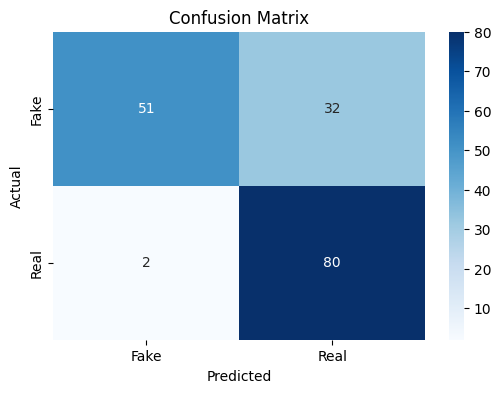

In [142]:
cm = confusion_matrix(Y3_test, y3_pred)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

ALGORITHM 3 : DECISION TREE

In [143]:
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X, Y, test_size = 0.33, stratify=Y, random_state=2)

WITH PACKAGE IMPLEMENTATION

In [144]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
dt=decision_tree.fit(X4_train,Y4_train)
y4_pred = dt.predict(X4_test)

MANUAL TESTING

In [145]:
manual_testing(dt)

The news is Real  [0]


EVALUATION
1) CLASSIFICATION REPORT

In [146]:
print('Classification Report:\n', classification_report(Y4_test,y4_pred,target_names=['Fake', 'Real']))

Classification Report:
               precision    recall  f1-score   support

        Fake       0.78      0.76      0.77        86
        Real       0.74      0.77      0.76        79

    accuracy                           0.76       165
   macro avg       0.76      0.76      0.76       165
weighted avg       0.76      0.76      0.76       165



2) CONFUSION MATRIX

Confusion Matrix:
 [[65 21]
 [18 61]]


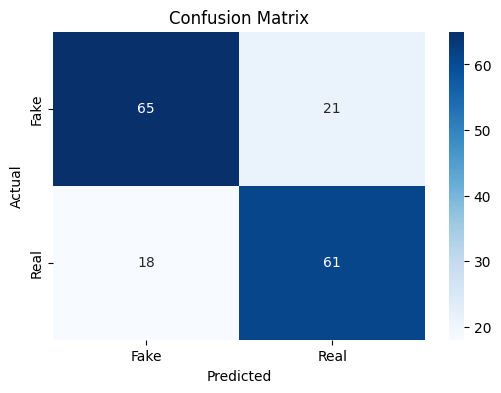

In [147]:
ConfusionMetrix = confusion_matrix(Y4_test,y4_pred)
print("Confusion Matrix:\n", ConfusionMetrix)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(ConfusionMetrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

WITHOUT PYTHON PACKAGE IMPLEMENTATION

In [148]:
X5_train, X5_test, Y5_train, Y5_test = train_test_split(X, Y, test_size = 0.33, stratify=Y, random_state=2)
#converting sparse matrix (csr_matrix) to array
X5_train = X5_train.toarray()
X5_test = X5_test.toarray()

In [149]:
class DecisionTreeScratch:
    def __init__(self, min_samples_split=2, max_depth=100):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.tree) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        if depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, n_features, replace=False)

        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)

        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold
        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        parent_entropy = self._entropy(y)

        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        n = len(y)
        n_left, n_right = len(left_idxs), len(right_idxs)
        e_left, e_right = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_left / n) * e_left + (n_right / n) * e_right

        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])

    def _most_common_label(self, y):
        return np.bincount(y).argmax()

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

In [150]:
# Train the Decision Tree model from scratch
DT = DecisionTreeScratch(max_depth=4)
DT.fit(X5_train, Y5_train)
y5_pred = DT.predict(X5_test)

MANUAL TESTING

In [151]:
manual_testing(DT)

The news is Real  [0]


EVALUATION
1) CLASSIFICATION REPORT

In [152]:
print('Classification Report:\n', classification_report(Y5_test,y5_pred,target_names=['Fake', 'Real']))

Classification Report:
               precision    recall  f1-score   support

        Fake       0.76      0.76      0.76        86
        Real       0.74      0.75      0.74        79

    accuracy                           0.75       165
   macro avg       0.75      0.75      0.75       165
weighted avg       0.75      0.75      0.75       165



2) CONFUSION MATRIX

Confusion Matrix:
 [[65 21]
 [20 59]]


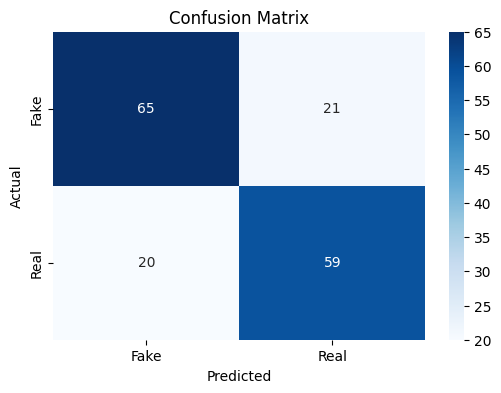

In [153]:
ConfusionMetrix = confusion_matrix(Y5_test,y5_pred)
print("Confusion Matrix:\n", ConfusionMetrix)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(ConfusionMetrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

ALGORITHM 4 : RANDOM FOREST CLASSIFIER

WITH PACKAGE IMPLEMENTATION

In [154]:
X6_train, X6_test, Y6_train, Y6_test = train_test_split(X, Y, test_size = 0.33, stratify=Y, random_state=2)

In [155]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X6_train,Y6_train)
y6_pred=rfc.predict(X6_test)

MANUAL TESTING

In [156]:
manual_testing(rfc)

The news is Real  [0]


EVALUATION
1) CLASSIFICATION REPORT

In [157]:
print('Classification Report:\n', classification_report(Y6_test,y6_pred,target_names=['Fake', 'Real']))

Classification Report:
               precision    recall  f1-score   support

        Fake       0.75      0.90      0.82        86
        Real       0.86      0.68      0.76        79

    accuracy                           0.79       165
   macro avg       0.81      0.79      0.79       165
weighted avg       0.80      0.79      0.79       165



2) CONFUSION MATRIX

Confusion Matrix:
 [[77  9]
 [25 54]]


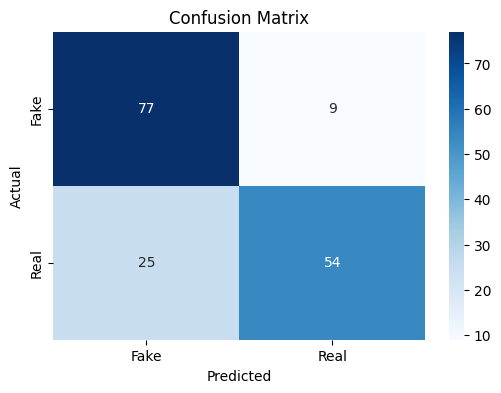

In [158]:
cm = confusion_matrix(Y6_test,y6_pred)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

WITHOUT PACKAGE IMPLEMENTATION

In [159]:
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)
    
class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_feature=None):
        self.n_trees = n_trees
        self.max_depth=max_depth
        self.min_samples_split=min_samples_split
        self.n_features=n_feature
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth,
                            min_samples_split=self.min_samples_split,
                            n_features=self.n_features)
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions

In [160]:
X7_train, X7_test, y7_train, y7_test = train_test_split(X, Y, test_size=0.33, random_state=1234)
#converting sparse matrix (csr_matrix) to array
X7_train = X7_train.toarray()
X7_test = X7_test.toarray()

In [161]:
clf = RandomForest(n_trees=20)
clf.fit(X7_train, y7_train)
y7_pred = clf.predict(X7_test)

MANUAL TESTING

In [162]:
manual_testing(clf)

The news is Real  [0]


EVALUATION
1) CLASSIFICATION REPORT

In [163]:
print('Classification Report:\n', classification_report(y7_test,y7_pred,target_names=['Fake', 'Real']))

Classification Report:
               precision    recall  f1-score   support

        Fake       0.82      0.83      0.82        87
        Real       0.81      0.79      0.80        78

    accuracy                           0.81       165
   macro avg       0.81      0.81      0.81       165
weighted avg       0.81      0.81      0.81       165



2) CONFUSION MATRIX

Confusion Matrix:
 [[72 15]
 [16 62]]


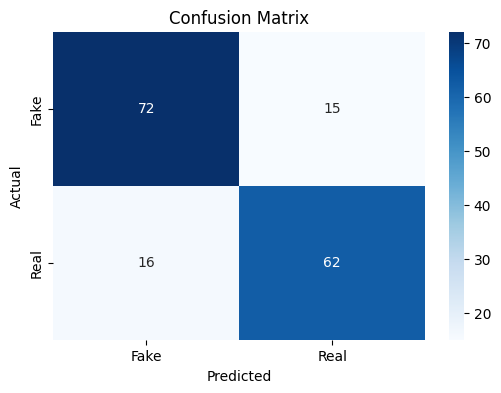

In [164]:
cm = confusion_matrix(y7_test,y7_pred)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

COMPARISON OF ALGORITHMS ON THE BASIS OF ACCURACY SCORES

In [165]:
models = ['Logistic Regression', 'Passive Agressive','Decision Tree','Random Forest']

WITH PYTHON PACKAGE

C:\Users\CW\AppData\Local\Temp\ipykernel_4380\1571414098.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy_scores, palette='Reds')


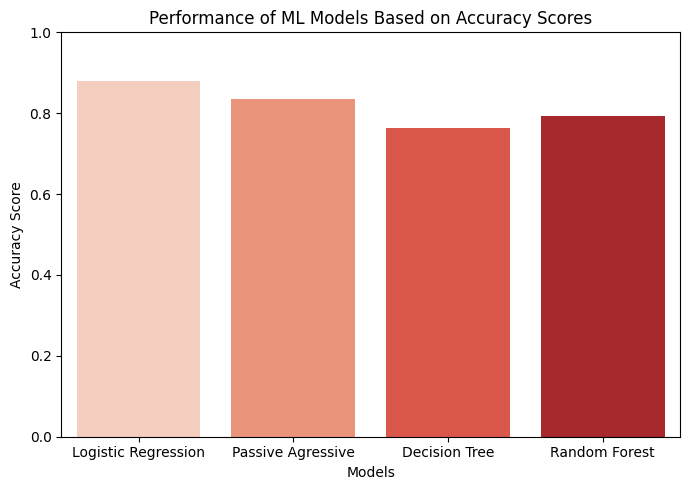

In [166]:
#ACCURACY SCORES OF ALL MODELS
lr_ac = accuracy_score(Y_test,y_pred)
pa_ac = accuracy_score(Y2_test,y2_pred)
dt_ac = accuracy_score(Y4_test,y4_pred)
rf_ac = accuracy_score(Y6_test,y6_pred)
accuracy_scores = [lr_ac,pa_ac,dt_ac,rf_ac]

# Plotting
plt.figure(figsize=(7, 5))
sns.barplot(x=models, y=accuracy_scores, palette='Reds')
plt.ylim(0, 1)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Performance of ML Models Based on Accuracy Scores')
plt.xticks()
plt.tight_layout()
plt.show()

WITHOUT PYTHON PACKAGE

C:\Users\CW\AppData\Local\Temp\ipykernel_4380\703168832.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy_scores, palette='RdPu')


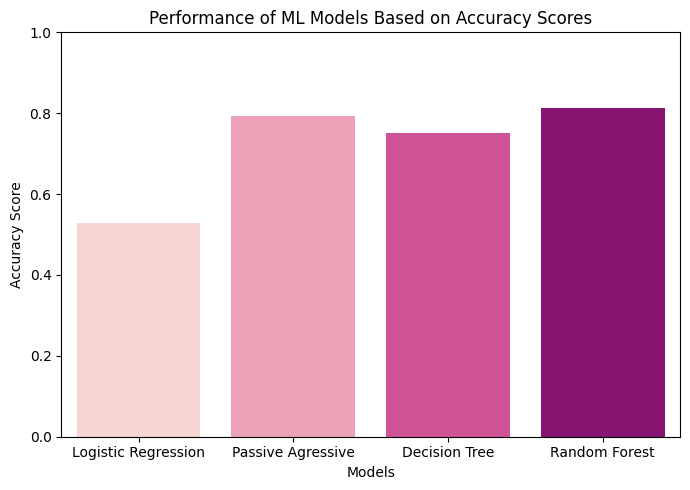

In [167]:
#ACCURACY SCORES OF ALL MODELS
lr1_ac = accuracy_score(y1_test,y1_pred)
pa1_ac = accuracy_score(Y3_test,y3_pred)
dt1_ac = accuracy_score(Y5_test,y5_pred)
rf1_ac = accuracy_score(y7_test,y7_pred)
accuracy_scores = [lr1_ac,pa1_ac,dt1_ac,rf1_ac]

# Plotting
plt.figure(figsize=(7, 5))
sns.barplot(x=models, y=accuracy_scores, palette='RdPu')
plt.ylim(0, 1)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Performance of ML Models Based on Accuracy Scores')
plt.xticks()
plt.tight_layout()
plt.show()